# Syvät neuroverkot Iris datalla
Tavoitteena on tehdä hyvin yksinkertainen neuroverkko, joka tunnistaisi `Iris` datasetissä olevat kukat oikeisiin luokkiin neljän eri selittävän muuttujan perusteella.

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder

Luetaan `Iris` datasetti ja asetetaan arvot `x` ja `y` muuttujiin. Tämän jälkeen vastemuuttuja one hot enkoodataan, sekä selittävät muuttujat standardisoidaan

In [152]:
df = pd.read_csv("C:\\Users\\kaspe\\Downloads\\iris.csv", header=None)
df = df.reindex(np.random.permutation(df.index))
x = df.drop(df.columns[4], axis=1)
y = pd.get_dummies(df[4], dtype=int)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

Tehdään malli, joka koostuu neljästä input neuronista, sekä yhdestä piilo tasosta, jossa on 10 neuronia. Ulostulolle annetaan 3 eri vaihtoehtoa, joitka aktivoidaan softmax funktiolla.

Kokeilin aika paljon eri neuronien määrää ja 10 tuntui tuottavan kivoimman oloisia tuloksia. Jos arvo oli liian pieni, niin se tuntui kuin nopan heitolta; tulisiko malli ikinä oppimaan validaatio dataa vai ei. Jos arvo oli isompi, niin malli yli oppi todella helposti.

In [153]:
model = Sequential([
    Input(shape=(4, )),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Suoritamme mallia `150` epochia, jotta näemme selvästi milloin malli ylioppii. `Batch_size` kannattaa asettaa pieneksi, koska datasetti on myös todella pieni. Laitoin validaatio datan kooksi `15%` joka saattaa olla liian suuri näin pienellä koulutus datalla, mutta huomasin että `10%`tuotti usein `100%`tarkkuuden heti alusta, josta ei tulisi esteettisesti hienoa graadia :D 

In [154]:
model_history = model.fit(x_scaled, y, epochs=150, batch_size=4, validation_split=0.15)

Epoch 1/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2997 - loss: 1.0957 - val_accuracy: 0.3913 - val_loss: 1.0013
Epoch 2/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4401 - loss: 0.9893 - val_accuracy: 0.6522 - val_loss: 0.8986
Epoch 3/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6895 - loss: 0.8382 - val_accuracy: 0.7826 - val_loss: 0.8135
Epoch 4/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7456 - loss: 0.8152 - val_accuracy: 0.7826 - val_loss: 0.7341
Epoch 5/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7844 - loss: 0.6923 - val_accuracy: 0.7826 - val_loss: 0.6668
Epoch 6/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7491 - loss: 0.6774 - val_accuracy: 0.7826 - val_loss: 0.6102
Epoch 7/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8262 - loss: 0.6161 - val_accuracy: 0.7826 - val_loss: 0.5592
Epoch 8/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7876 - loss: 0.5803 - val_accuracy: 0.7826 - v

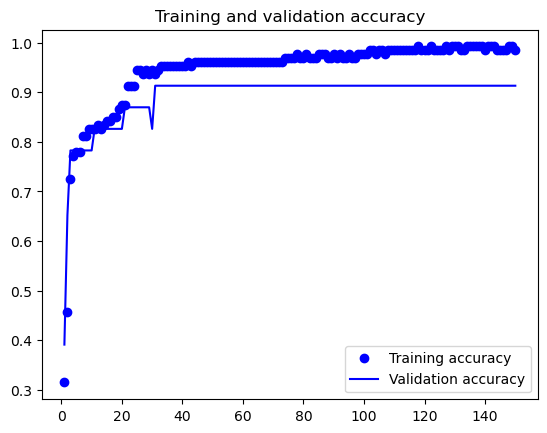

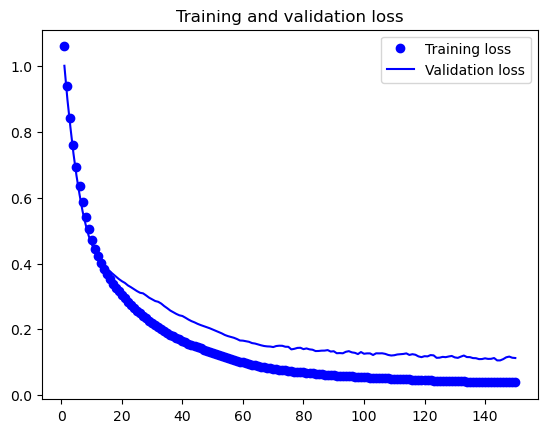

In [155]:
import matplotlib.pyplot as plt
acc = model_history.history["accuracy"]
val_acc = model_history.history["val_accuracy"]
loss = model_history.history["loss"]
val_loss = model_history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

Kuten kuvista huomaa on vaikea sanoa mitään selvää pistettä missä malli ylioppisi ja validaatio arvot alkaisivat kärsiä, mutta luultavasti `60 epochin` kohdalla olisi hyvä lopettaa, koska malli ei tunnu parantavan validaatio tarkkuutta siitä eteenpäin.